In [1322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# 1 - analyzing air quality data

In [1323]:
# 1.1 load the data

air_data = pd.read_csv('global_air_quality.csv')
air_data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [1324]:
# 1.2

fact_array = np.array(air_data.loc[:,'FactValueNumeric'])
air_data.insert(34,'PM25_Value', fact_array)
air_data.loc[:,['FactValueNumeric', 'PM25_Value']]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [1325]:
# 1.3 

grouped = air_data.groupby(['ParentLocation'])
average_values = grouped['PM25_Value'].mean().reset_index()
average_values=average_values.rename(columns={"PM25_Value":"Average_PM25"})
air_data=pd.merge(air_data, average_values, on='ParentLocation')
print(air_data.loc[:,['Location', 'ParentLocation', 'PM25_Value','Average_PM25']])

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [1326]:
# 1.4

sorted = air_data.sort_values(by='Average_PM25', ascending=False)
sorted.iloc[[0], [4]]

# the continent with the highest average air pollution is the eastern mediterranean. this is suprising, as it is not a place that is known for high levels of manufacturing (i think?).

,ParentLocation
9449,Eastern Mediterranean


In [ ]:
# 1.5
air_data=air_data.loc[:,['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]
air_data.to_csv('hw7_created_dataframe.csv')
# i saved the data frame to my github repo with the name "hw7_created_dataframe.csv"

# 2 - planets, planets, planets!

Text(0.5, 1.0, 'Exoplanets: A Comparison of Mass to Orbital Period')

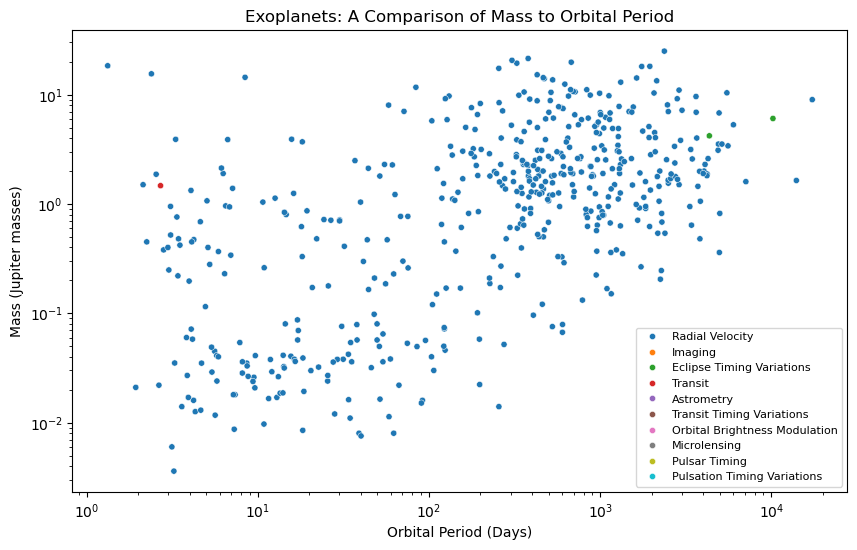

In [1328]:
planets = sns.load_dataset('planets')
plt.figure(figsize=(10,6))
sns.scatterplot(data=planets, x='orbital_period', y='mass', hue='method', s=20)
plt.legend(loc='lower right', prop={'size':8})
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (Days)')
plt.ylabel('Mass (Jupiter masses)')
plt.title('Exoplanets: A Comparison of Mass to Orbital Period')

In [1329]:
x=[5,3,7]
y=x.sort()
print(x)

[3, 5, 7]


Text(0.5, 1.0, 'Exoplanet Discoveries Per Year')

<Figure size 1300x600 with 0 Axes>

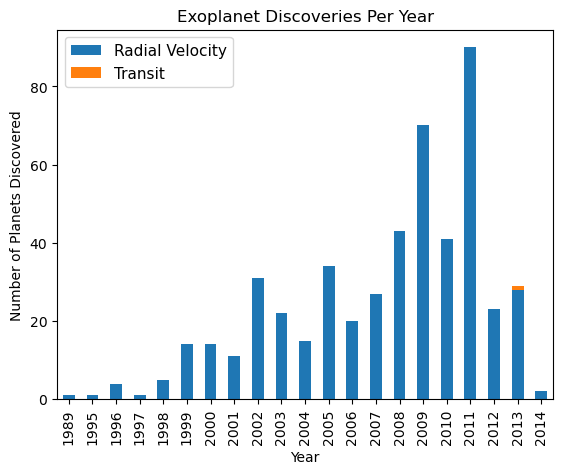

In [ ]:
# 2.2 
planets = planets.dropna()
groups=planets.groupby(['year', 'method'])
years_count = groups.size().reset_index()
years_count=years_count.pivot_table(index='year', columns='method')
plt.figure(figsize=(13,6))
years_count.plot(kind='bar', stacked=True)
plt.bar(planets['year'], planets['number'])
plt.legend(loc='upper left', prop={'size':11}, labels=['Radial Velocity', 'Transit'])
plt.xlabel('Year')
plt.ylabel('Number of Planets Discovered')
plt.title('Exoplanet Discoveries Per Year')

# i tried to do this using seaborn instead of maptplotlib, but i could not find a good way to do it, and it was just a lot easier to do using matplotlib